# Homework 2
### Author: Mateusz Sieniawski

Import dataset (Boston Housing)

In [3]:
import shap
import pandas as pd
import seaborn as sns
import numpy as np

X, y = shap.datasets.boston()

Understand the data

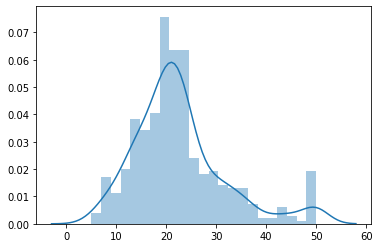

In [91]:
sns.distplot(y)

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

In [7]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


To output multiple subplots, the figure containing the passed axes is being cleared


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33cfa01f98>,
      dtype=object)

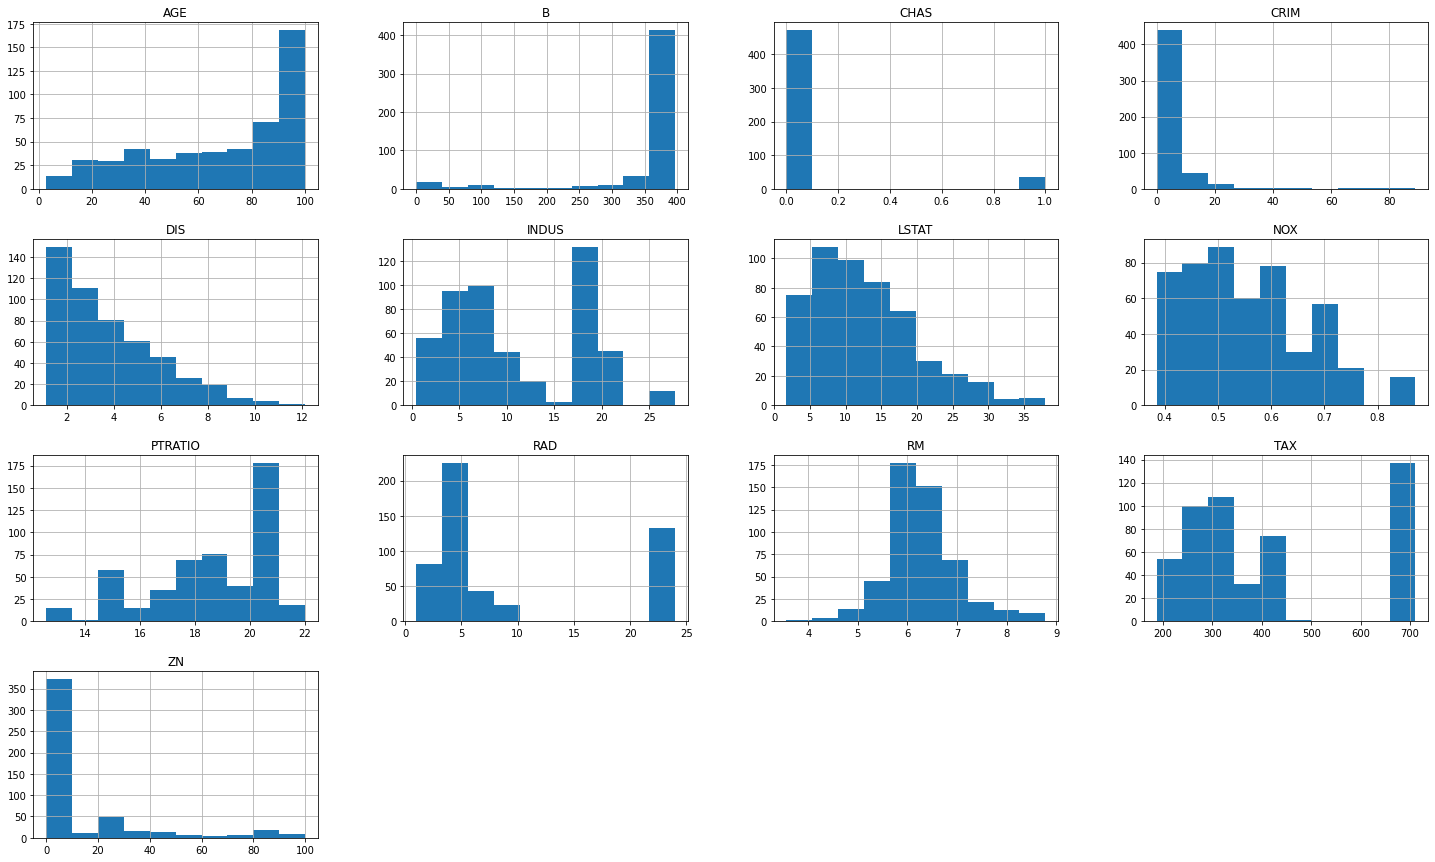

In [9]:
import matplotlib.pyplot as plt

# Plot the data
fig = plt.figure(figsize = (25,15))
ax = fig.gca()
X.hist(ax = ax)

### (1) For the selected data set, train at least one tree-based ensemble model (random forest, gbm, catboost or any other boosting)
Train a xgboost model

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error as msle


# split data into train and test sets
seed = 42
test_size = 0.2
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=seed)

model = xgb.XGBClassifier(eval_metric="rmse")
model.fit(X_train, y_train)
print(model)

y_pred = model.predict(X_test)
loss = msle(y_test, y_pred)
print(f"Loss: {loss:.3f}")

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
Loss: 0.059


### (2) for some selected observations (two or three) from this dataset, calculate predictions for model (1)

In [ ]:
X100 = shap.utils.sample(X, 100)

In [152]:
X100_pred = model.predict(X100)
print("Observation 0th:")
print(X100.iloc[0])
print(f"Prediction: {X100_pred[0]}")
print("\nObservation 1st:")
print(X100.iloc[1])
print(f"Prediction: {X100_pred[1]}")

Observation 0th:
CRIM         0.13914
ZN           0.00000
INDUS        4.05000
CHAS         0.00000
NOX          0.51000
RM           5.57200
AGE         88.50000
DIS          2.59610
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          396.90000
LSTAT       14.69000
Name: 172, dtype: float64
Prediction: 19.3

Observation 1st:
CRIM         0.22927
ZN           0.00000
INDUS        6.91000
CHAS         0.00000
NOX          0.44800
RM           6.03000
AGE         85.50000
DIS          5.68940
RAD          3.00000
TAX        233.00000
PTRATIO     17.90000
B          392.74000
LSTAT       18.80000
Name: 47, dtype: float64
Prediction: 16.6


### (3) for observations selected in (2), calculate the decomposition of model prediction using SHAP, Break Down or both (packages for R: DALEX, iml, packages for python: shap, dalex).
### (4) find two observations in the data set, such that they have different most important variables (e.g. age and gender are the most important for observation A, but race and class for observation B)
### (5) (if possible) select one variable and find two observations in the data set such that for one observation this variable has a positive effect and for the other a negative effect

In [41]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Permutation explainer: 507it [09:33,  1.15s/it]                         


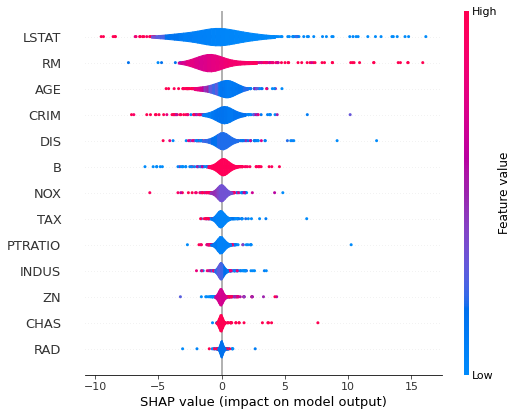

In [74]:
shap.summary_plot(shap_values, X, plot_type="violin")

In [80]:
shap.initjs()
shap.plots.force(shap_values[0])

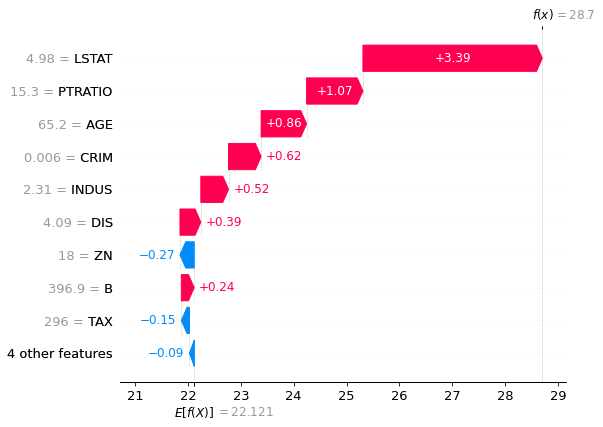

In [77]:
shap.plots.waterfall(shap_values[0])

In [72]:
shap.plots.force(shap_values[1])

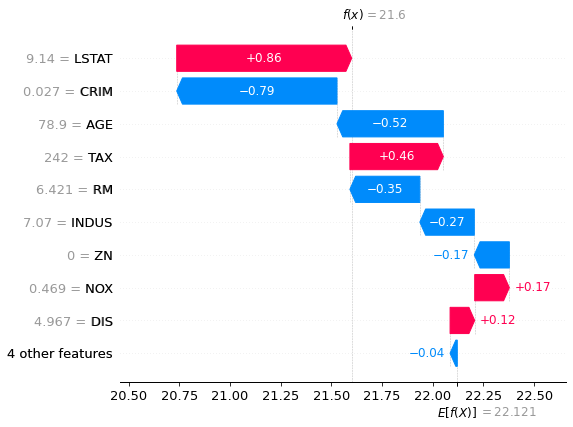

In [78]:
shap.plots.waterfall(shap_values[1])

Shap values plots for additional 3 observations

In [73]:
shap.plots.force(shap_values[2])

In [75]:
shap.plots.force(shap_values[3])

In [76]:
shap.plots.force(shap_values[4])

### (6) train a second model (of any class, neural nets, linear, other boosting) and find an observation for which BD/shap attributions are different between the models
Train linear regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"Loss: {rms}")

Loss: 4.9286021826653466


In [116]:
explainerReg = shap.Explainer(reg.predict, X100)
shap_valuesReg = explainerReg(X)

Permutation explainer: 507it [00:14,  8.99it/s]                         


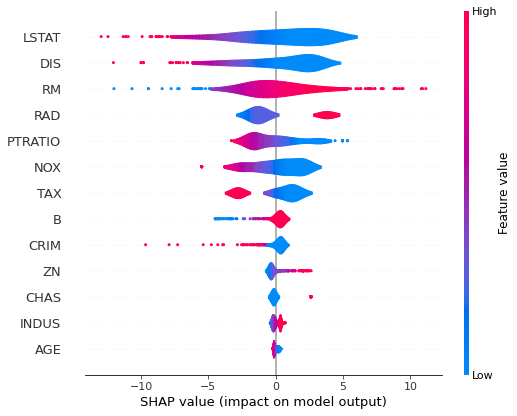

In [117]:
shap.summary_plot(shap_valuesReg, X, plot_type="violin")

Linear Regression shap values

In [122]:
shap.initjs()
shap.plots.force(shap_valuesReg[1])

XGBoost shap values

In [123]:
shap.plots.force(shap_values[1])

# (7) Comments

### (4)
For the 0th and 1st observation (shap values plots above) most important variables differ. For the 0th observation the most important variables are LSTAT and PTRATIO, whilst for the 1st these are LSTAT and RM.

### (5)
The variable CRIM have negative effect on 0th observation and positive effect on 1st observation.

### (6)
The linear regression have different shap attribution than xgboost on 1st observation (plot above). For xgboost the most important features are CRIM, LSTAT and AGE, while for linear regression LSTAT, RAD and DIS.